# <font color='#eb3483'> Data Visualization Exercises </font>

1. In this notebook we looked at one type of relational plot, scatter plots, but there are a bunch of other built in plots that will knock your socks off. One cool thing is that we can build linear regressions (i.e. fit a line to our data) directly through seaborn using the lmplot function (google or use the help docs to learn more). Make a plot of total bill vs tip and fit a line of best fit to it using the tips dataset. Can you do the same thing in a facet grid for each time of meal separately and also color the points/make separate lines for smokers/non-smokers in each sub-plot?

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#This is so that you don't see a bunch of code 'warnings' (things that you could change but don't have to right now)
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

#This makes all of our graphs show up in our notebook when they're made
%matplotlib inline
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [36]:
tips = sns.load_dataset("tips")
tips.column

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [37]:
tips.day.unique

<bound method Series.unique of 0       Sun
1       Sun
2       Sun
3       Sun
4       Sun
       ... 
239     Sat
240     Sat
241     Sat
242     Sat
243    Thur
Name: day, Length: 244, dtype: category
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']>

In [14]:
tips.sort_values(by = "total_bill", ascending = False)

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
156,48.17,5.00,Male,No,Sun,Dinner,6
182,45.35,3.50,Male,Yes,Sun,Dinner,3
...,...,...,...,...,...,...,...
149,7.51,2.00,Male,No,Thur,Lunch,2
111,7.25,1.00,Female,No,Sat,Dinner,1
172,7.25,5.15,Male,Yes,Sun,Dinner,2
92,5.75,1.00,Female,Yes,Fri,Dinner,2


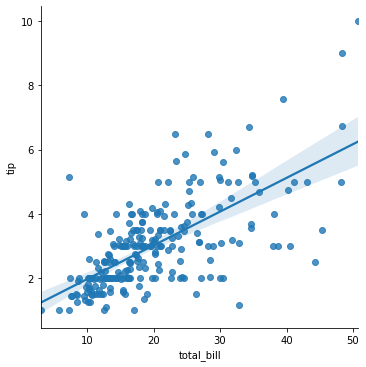

In [26]:
sns.lmplot(x = "total_bill", y = "tip", data = tips)

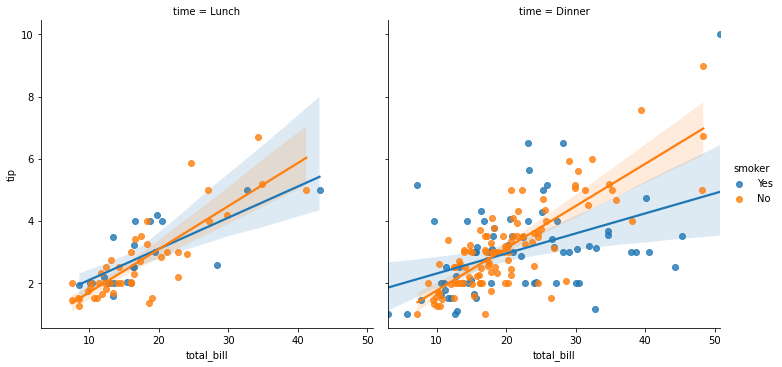

In [43]:
sns.lmplot(x = "total_bill", y = "tip", data = tips, hue = "smoker", col = "time")

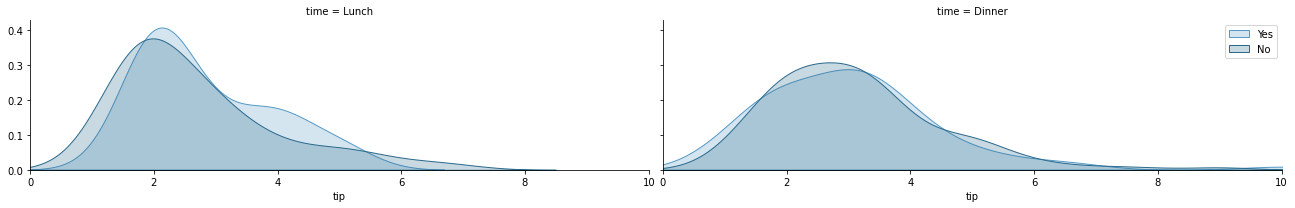

In [50]:
fg = sns.FacetGrid(tips, hue="smoker", aspect=3, palette="PuBu_d", col = "time")
fg.map(sns.kdeplot, "tip", shade=True)
fg.set(xlim=(0, 10));
plt.legend()

2. Let's play around with some different kinds of categorical plots. Make a violin plot to explore the relationship between being a smoker and tipping, colored by day of the week. Mix it up and try making a box plot too!

<AxesSubplot:xlabel='smoker', ylabel='tip'>

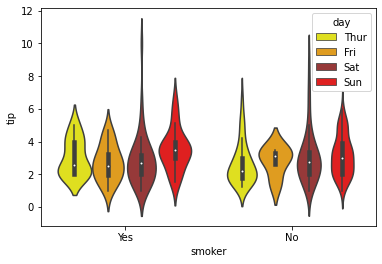

In [41]:
pal = {"Thur" : "yellow", "Fri" : "orange", "Sat" : "brown", "Sun" : "red"}
sns.violinplot(x = "smoker", y = "tip", data = tips, hue = "day", palette = pal)

<AxesSubplot:xlabel='smoker', ylabel='tip'>

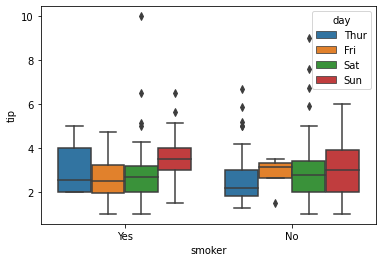

In [42]:
sns.boxplot(x = "smoker", y = "tip", data = tips, hue = "day")

3. Go to the seaborn graph library (https://seaborn.pydata.org/examples/index.html) and find a plot we haven't looked at in class (i.e. dist plot, heat map, cluster plot) and make it using a dataset from seaborn. This is also a great workflow to use during your internship when you're trying to figure out interesting ways to look at your data or results!

In [96]:
pen = sns.load_dataset("penguins")
pen.head(20)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [102]:
pen = pen.dropna(axis = "index", how = "all")

In [98]:
pen = pen.drop(['species', 'island', 'sex', "body_mass_g", "flipper_length_mm"], axis = "columns")
pen

,bill_length_mm,bill_depth_mm
0,39.1,18.7
1,39.5,17.4
2,40.3,18.0
3,NaN,NaN
4,36.7,19.3
...,...,...
339,NaN,NaN
340,46.8,14.3
341,50.4,15.7
342,45.2,14.8


In [99]:
pen

,bill_length_mm,bill_depth_mm
0,39.1,18.7
1,39.5,17.4
2,40.3,18.0
3,NaN,NaN
4,36.7,19.3
...,...,...
339,NaN,NaN
340,46.8,14.3
341,50.4,15.7
342,45.2,14.8


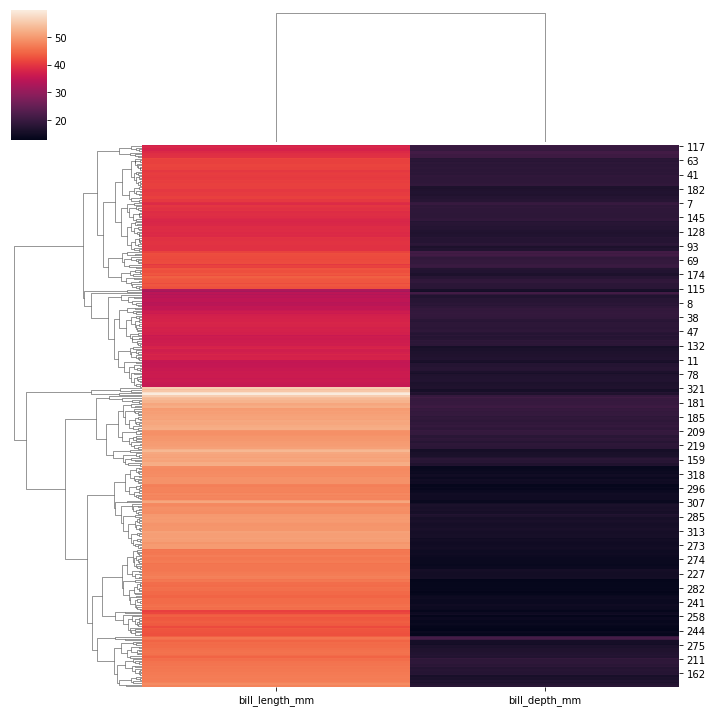

In [91]:
sns.clustermap(pen)